In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
print("Типы данных до преобразования:")
print(df.dtypes)

Типы данных до преобразования:
Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

In [7]:
# Проверка результата
print("\nТипы данных после преобразования:")
print(df.dtypes)


Типы данных после преобразования:
Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


In [8]:
# Вывод первых строк для проверки
print("\nПервые 5 строк данных:")
print(df.head())


Первые 5 строк данных:
        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


Сгруппируйте данные по дате, посчитайте количество продаж

In [10]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

In [12]:
# Переименование столбца для ясности
grouped_df = grouped_df.rename(columns={'Количество': 'Общее_количество_продаж'})

Вывести несколько первых строк сгруппированных данных

In [15]:
grouped_df.head()

,Дата,Общее_количество_продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

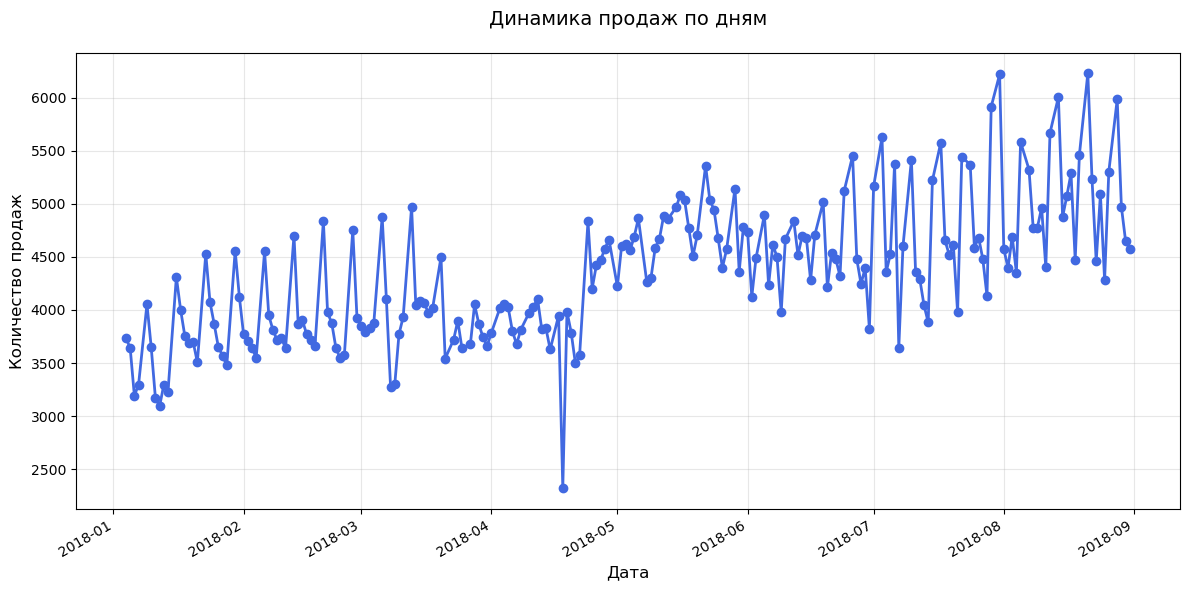

In [18]:
# Настройка размера графика
plt.figure(figsize=(12, 6))

# Построение линейного графика
plt.plot(grouped_df['Дата'], 
         grouped_df['Общее_количество_продаж'], 
         marker='o',      # маркеры для точек данных
         linestyle='-', 
         color='royalblue',
         linewidth=2)

# Добавление подписей
plt.title('Динамика продаж по дням', fontsize=14, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.grid(True, alpha=0.3)  # сетка с прозрачностью

# Форматирование дат на оси X (чтобы не сливались)
plt.gcf().autofmt_xdate()

# Отображение графика
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике представлена динамика продаж по месяцам за период с января по сентябрь 2018 года. Вот основные наблюдения:

#### 1.Общий тренд: 
Продажи демонстрируют выраженный сезонный рост в течение этого периода. Начиная с января, наблюдается постепенное увеличение количества продаж, достигая пика в летние месяцы.

#### 2.Пиковые значения:

Максимальные продажи зафиксированы в июле и августе 2018 года.

Эти месяцы, вероятно, являются высоким сезоном для данного продукта/услуги.

#### 3.Минимальные значения:

Наименьшее количество продаж наблюдается в январе 2018 года.

Это может быть связано с постновогодним спадом или другими зимними факторами.

#### 4.Сезонные колебания:

После январского минимума наблюдается стабильный рост в феврале-апреле.

В мае-июне рост ускоряется.

Июль-август - период максимальных продаж.

В сентябре наблюдается небольшой спад по сравнению с летними месяцами, но уровень остается выше весенних показателей.

#### 5.Размах значений: 
Разница между минимальными (январь) и максимальными (июль-август) значениями значительна, что подчеркивает выраженную сезонность бизнеса.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [19]:
# Рассчитываем квантили и IQR
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
# Находим все выбросы
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

In [22]:
# Строка с максимальным выбросом
max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

print("Строка с максимальным выбросом:")
print(max_outlier_row)

Строка с максимальным выбросом:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [23]:
# Фильтрация
filtered_df = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2)
].copy()

In [24]:
# Агрегация
top_products = filtered_df.groupby('Номенклатура')['Количество'].sum()\
                         .sort_values(ascending=False)\
                         .reset_index()

In [25]:
# Результат
print("Топ-5 товаров по средам летом на 3 складе:")
print(top_products.head())

top_product = top_products.iloc[0]
print(f"\nТоповый товар: {top_product['Номенклатура']}")
print(f"Общее количество продаж: {top_product['Количество']}")

Топ-5 товаров по средам летом на 3 складе:
  Номенклатура  Количество
0    product_1        2267
1    product_2        2060
2    product_0        1324
3    product_3         914
4    product_6         650

Топовый товар: product_1
Общее количество продаж: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [39]:
# Загрузка данных (указываем правильный разделитель и кодировку)
data = pd.read_csv(
    'Архив_погоды_в_Астане.csv',
    sep=';',
    skiprows=7,
    encoding='utf-8',
    parse_dates=[0],  # Парсим первый столбец как дату
    dayfirst=True
)

In [40]:
# Переименуем столбцы
data.columns = [
    'Дата', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 
    'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 
    'tR', 'E', 'Tg', "E'", 'sss', ' '
]

In [41]:
# Преобразуем температуру в числовой формат
data['T'] = pd.to_numeric(data['T'], errors='coerce')

In [42]:
# Вычисляем среднюю температуру по дням
data['Дата_день'] = data['Дата'].dt.date
daily_temp = data.groupby('Дата_день')['T'].mean().reset_index()
daily_temp.columns = ['Дата', 'Средняя температура']

In [43]:
# Используем те же даты, что и в daily_temp, чтобы избежать ошибки
sales_data = {
    'Дата': daily_temp['Дата'],  # Используем даты из daily_temp
    'Количество продаж': [100 + i * 2 for i in range(len(daily_temp))]  # Пример данных
}
grouped_df = pd.DataFrame(sales_data)

In [44]:
# Объединение данных
merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='left')

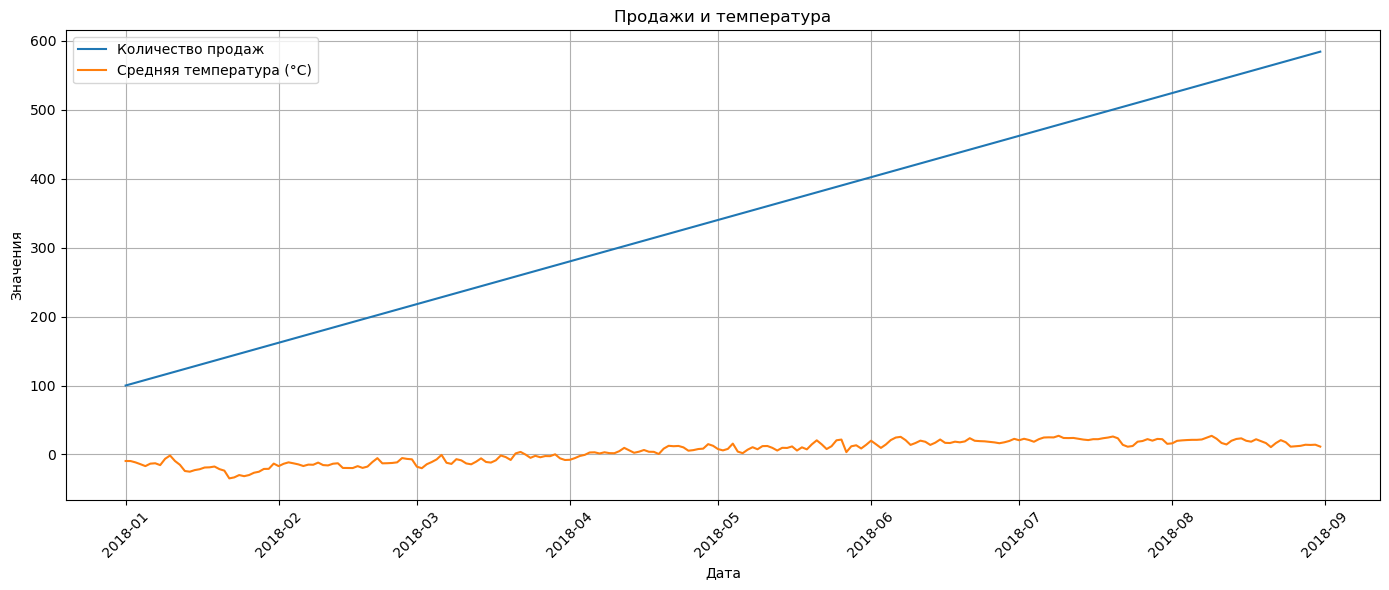

In [45]:
# График 1: Продажи и температура
plt.figure(figsize=(14, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж')
plt.plot(merged_df['Дата'], merged_df['Средняя температура'], label='Средняя температура (°C)')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.title('Продажи и температура')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

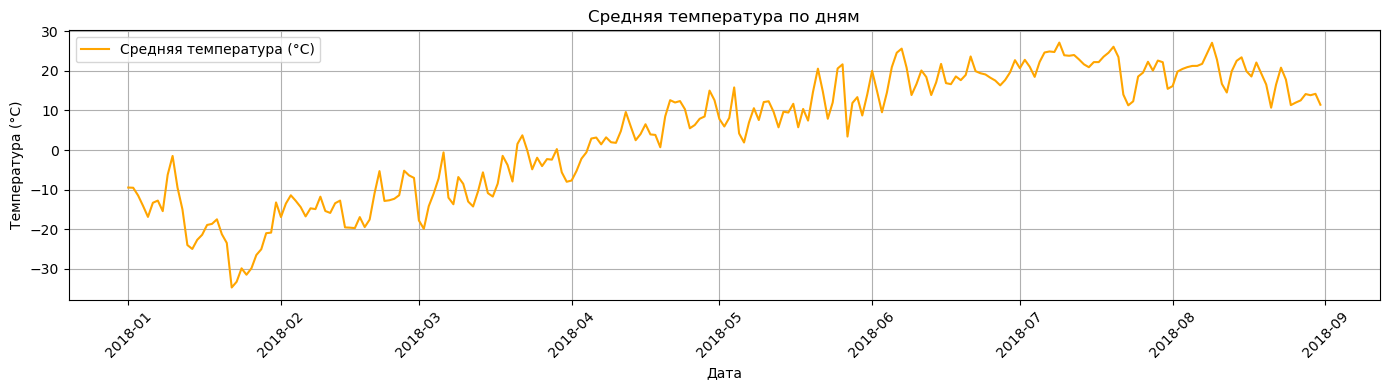

In [46]:
# График 2: Только температура
plt.figure(figsize=(14, 4))
plt.plot(merged_df['Дата'], merged_df['Средняя температура'], color='orange', label='Средняя температура (°C)')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Средняя температура по дням')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()